In [47]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
WNlemma = nltk.WordNetLemmatizer()
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
#importing the data
data = pd.read_csv('fake_job_postings.csv')
target = data['fraudulent']

## Exploratory Data Analysis

In [3]:
print((data.isna().sum()/len(data))*100)
#drop department and salary_range because it have about 60 persent null values and removing irrelavent data from the dataset
data.drop(['job_id','salary_range','department','benefits'],axis=1,inplace=True)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64


In [4]:
data.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

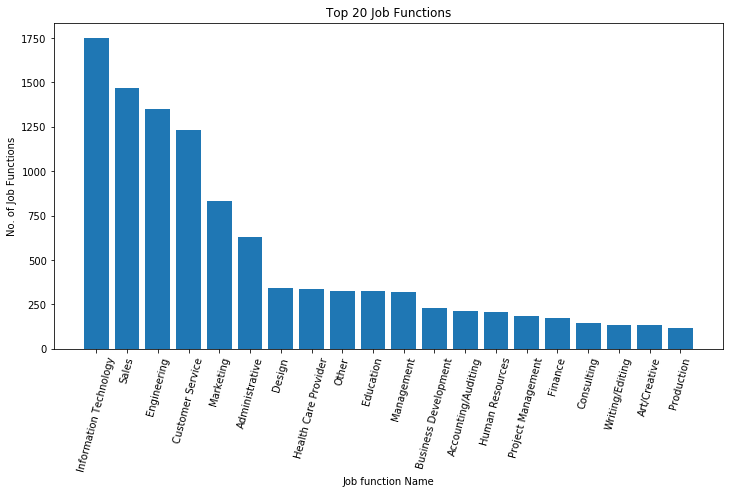

In [5]:
#Plotting the bar plot jobs funtion counts
plt.figure(figsize=(12,6))
plt.bar(data.function.value_counts().index[:20],data.function.value_counts()[:20])
plt.title('Top 20 Job Functions')
plt.xlabel('Job function Name')
plt.ylabel("No. of Job Functions")
degrees = 75
plt.xticks(rotation=degrees)

Text(0, 0.5, 'Industry Name')

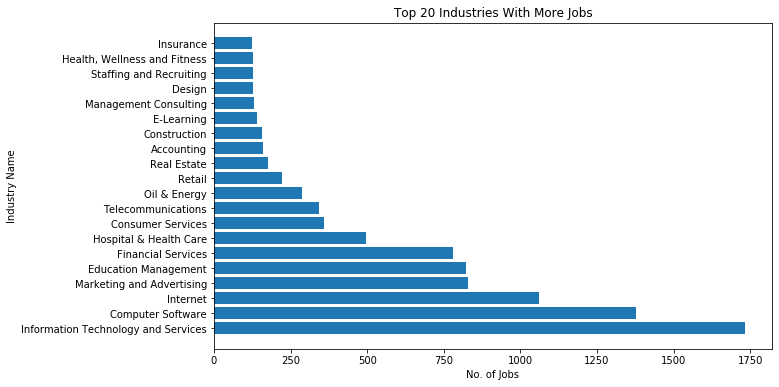

In [6]:
#plot top 20 industries which give most of job posting
plt.figure(figsize=(10,6))
plt.barh(data.industry.value_counts()[:20].index,data.industry.value_counts()[:20])
plt.title('Top 20 Industries With More Jobs')
plt.xlabel('No. of Jobs')
plt.ylabel("Industry Name")

In [7]:
#separate both data to analyse them
fradulent_data = data[data.fraudulent==1]
non_fradulent_data = data[data.fraudulent==0]

print('Number of fake Job description: ',len(fradulent_data))
print('Number of correct job description: ',len(non_fradulent_data))

Number of fake Job description:  866
Number of correct job description:  17014


In [8]:
#Missing values in fake jobs data
fradulent_data.isna().sum()/866*100

title                   0.000000
location                2.193995
company_profile        67.782910
description             0.115473
requirements           17.782910
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        27.829099
required_experience    50.230947
required_education     52.078522
industry               31.755196
function               38.914550
fraudulent              0.000000
dtype: float64

In [9]:
#missing values in correct jobs
non_fradulent_data.isna().sum()/len(non_fradulent_data)*100

title                   0.000000
location                1.921947
company_profile        15.992712
description             0.000000
requirements           14.934760
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        18.984366
required_experience    38.879746
required_education     44.986482
industry               27.201128
function               35.958622
fraudulent              0.000000
dtype: float64

In [10]:
#removing target values form dataset
data.drop(['fraudulent'],axis=1,inplace=True)

In [11]:
data.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

# Cleaning and preprocessing the data

In [12]:
import re
def remove_links(text):
    text  = re.sub(r'http://[\w|\S]+',' ',str(text))
    return text

In [13]:
def lower_text(text):
    text = str(text)
    text = ' '.join(x.lower() for x in text.split())
    return text

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stopWords(text):
    text = str(text)
    text = ''.join( x for x in text if x.split() not in stop)
    return(text)

In [15]:
def remove_non_imp_words(series):
    most_freq = pd.Series(' '.join(series).split()).value_counts()[:30]
    less_freq = pd.Series(' '.join(series).split()).value_counts()[-30:]
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in most_freq))
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
    return series

def remove_nan(text):
    if text == 'nan' or text == '':
        text = 'not given'
    return text

In [16]:
def data_cleaning(feature):
    feature = feature.apply(lambda x : remove_links(x))
    feature = feature.apply(lambda x : lower_text(x))
    feature = feature.apply(lambda x : remove_stopWords(x))
    feature = feature.str.replace('[^\w\s]',' 111')
    feature = remove_non_imp_words(feature)
    feature = feature.apply(lambda x: ' '.join([WNlemma.lemmatize(word) for word in x.split()]))
    feature = feature.apply(lambda x : remove_nan(x))
    return feature


In [17]:
data['required_education'].fillna('no_info_about_education',inplace = True)
data['employment_type'].fillna('no_info_about_employment',inplace = True)
data['required_experience'].fillna('experience_not_asked',inplace = True)
data['industry'].fillna('industry_not_given',inplace = True)
data['function'].fillna('function_not_given',inplace = True)

In [18]:
#dealing with company profile feature
for i in range(len(data.company_profile)):
    if data.company_profile[i]=='NaN':
        data.company_profile[i] = 'company_profile_not_given'
    else:
        data.company_profile[i] = 'company_profile_given'

C:\Users\Pranjal Soni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#dealing catogorical data
cat_cols = ['employment_type','required_experience','required_education','industry','function','company_profile']
for c in cat_cols:
    encoded = pd.get_dummies(data[c])
    data = pd.concat([data,encoded],axis = 1 )
cat_cols = ['employment_type','required_experience','required_education','industry','function','title','location','company_profile']
data.drop(cat_cols,axis=1,inplace=True)

In [20]:
#dealing with text data
description = data['description']+ ' ' +  data['requirements']
description = data_cleaning(description)

In [21]:
tfidf = TfidfVectorizer( min_df = 0.05, ngram_range=(1,3))
tfidf_features = tfidf.fit_transform(description) 
tfidf_vect_df = pd.DataFrame(tfidf_features.todense(), columns = tfidf.get_feature_names())
data = pd.concat([data, tfidf_vect_df], axis = 1)
data.drop(['description','requirements'],axis = 1 , inplace = True)

In [22]:
data.shape

(17880, 727)

# Applying different classification algorithms

In [23]:
from sklearn.model_selection import train_test_split
X = data
y = np.array(target)
y = y.reshape((17880,))

In [24]:
X = X.to_numpy()

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score ,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_clf = RandomForestClassifier(n_jobs=-1)

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_ix, test_ix in kfold.split(X, y):
    #select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    #fit the model with training data
    rf_clf.fit(train_X,train_y)
    
    #feature_selection
    sfm = SelectFromModel(rf_clf,threshold=0.003)
    sfm.fit(train_X, train_y)
    
    X_important_train = sfm.transform(train_X)
    X_important_test = sfm.transform(test_X)
    
    rf_clf = RandomForestClassifier(n_estimators=459, max_depth=30,oob_score=True,n_jobs=-1)
    rf_clf.fit(X_important_train, train_y)
    y_train_pred = rf_clf.predict(X_important_train)
    y_test_pred = rf_clf.predict(X_important_test)
    #evalute the model
    print('Train Data Accuracy : ',accuracy_score(train_y,y_train_pred))
    print('Test Data Accuracy : ',accuracy_score(test_y,y_test_pred))
    
    print()
    print('Confusion Matrix of Train Data : \n',confusion_matrix(train_y,y_train_pred))
    print('Confusion Matrix of Test Data : \n',confusion_matrix(test_y,y_test_pred))
    print()
    #pricision and recall for test and train data
    print('Train Data Precision : ',precision_score(train_y,y_train_pred))
    print('Test Data Precision : ',precision_score(test_y,y_test_pred))
    print()
    print('Train Data Recall : ',recall_score(train_y,y_train_pred))
    print('Test Data Recall : ',recall_score(test_y,y_test_pred))
    print()

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9918903803131991
Test Data Accuracy :  0.9753914988814317

Confusion Matrix of Train Data : 
 [[13611     0]
 [  116   577]]
Confusion Matrix of Test Data : 
 [[3402    1]
 [  87   86]]

Train Data Precision :  1.0
Test Data Precision :  0.9885057471264368

Train Data Recall :  0.8326118326118326
Test Data Recall :  0.49710982658959535

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9901426174496645
Test Data Accuracy :  0.9751118568232662

Confusion Matrix of Train Data : 
 [[13606     5]
 [  136   557]]
Confusion Matrix of Test Data : 
 [[3401    2]
 [  87   86]]

Train Data Precision :  0.9911032028469751
Test Data Precision :  0.9772727272727273

Train Data Recall :  0.8037518037518038
Test Data Recall :  0.49710982658959535

>Train: 0=13611, 1=693, Test: 0=3403, 1=173
Train Data Accuracy :  0.9904921700223713
Test Data Accuracy :  0.9765100671140939

Confusion Matrix of Train Data : 
 [[1360

In [26]:
for feature_list_index in sfm.get_support(indices=True):
    print(data.columns[feature_list_index],end= ", ")

has_company_logo, has_questions, Full-time, Part-time, no_info_about_employment, Entry level, Mid-Senior level, experience_not_asked, Some High School Coursework, no_info_about_education, Accounting, Hospital & Health Care, Oil & Energy, industry_not_given, Administrative, Engineering, function_not_given, 111amp, ability, any, at, by, call, can, computer, control, data, duty, engineering, environment, equipment, excel, field, flexible, follow, from, full, full 111time, get, home, hour, industry, information, internet, it, job, manager, must, necessary, no, not, others, per, perform, phone, position, process, qualification, required, schedule, school diploma, seeking, service, standard, start, system, their, this, time, timely, value, via, word, year, your, 

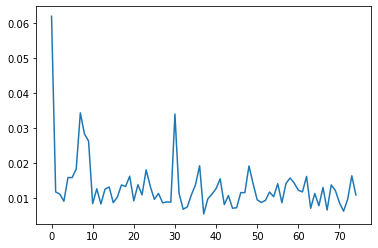

In [32]:
plt.plot(rf_clf.feature_importances_)

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb_clf  = GaussianNB()
gnb_clf.fit(X_important_train, train_y)
y_train_pred = gnb_clf.predict(X_important_train)
y_test_pred = gnb_clf.predict(X_important_test)
#evalute the model
print('Train Data Accuracy : ',accuracy_score(train_y,y_train_pred))
print('Test Data Accuracy : ',accuracy_score(test_y,y_test_pred))

print()
print('Confusion Matrix of Train Data : \n',confusion_matrix(train_y,y_train_pred))
print('Confusion Matrix of Test Data : \n',confusion_matrix(test_y,y_test_pred))
print()
#pricision and recall for test and train data
print('Train Data Precision : ',precision_score(train_y,y_train_pred))
print('Test Data Precision : ',precision_score(test_y,y_test_pred))
print()
print('Train Data Recall : ',recall_score(train_y,y_train_pred))
print('Test Data Recall : ',recall_score(test_y,y_test_pred))
print()

Train Data Accuracy :  0.8387863534675615
Test Data Accuracy :  0.8288590604026845

Confusion Matrix of Train Data : 
 [[11549  2063]
 [  243   449]]
Confusion Matrix of Test Data : 
 [[2863  539]
 [  73  101]]

Train Data Precision :  0.1787420382165605
Test Data Precision :  0.1578125

Train Data Recall :  0.6488439306358381
Test Data Recall :  0.5804597701149425



In [46]:
d = pd.read_csv('fake_job_postings.csv')
d

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
